# 导入数据集

2.1 基本概念

    与Python中原生的List类型不同，Numpy中用ndarray类型来描述一组数据：

In [2]:
from numpy import array
from numpy.random import normal, randint
#使用List来创造一组数据
data = [1, 2, 3]
#使用ndarray来创造一组数据
data = array([1, 2, 3])
#创造一组服从正态分布的定量数据
data = normal(0, 10, size=10)
#创造一组服从均匀分布的定性数据
data = randint(0, 10, size=10)

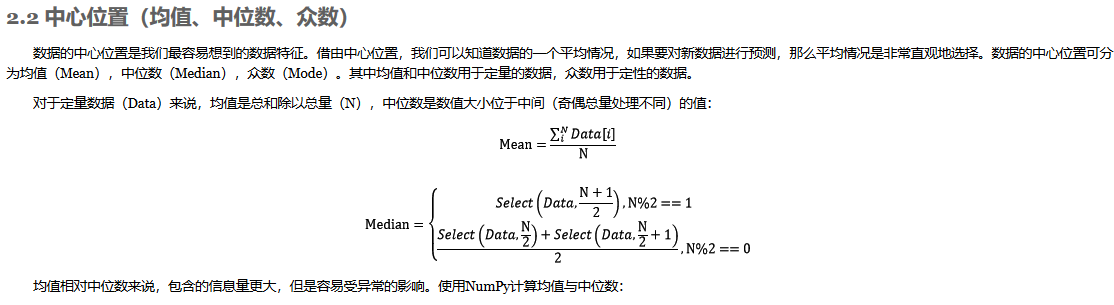

In [7]:
from numpy import mean, median
data = randint(0, 10, size=10)

#计算均值， 计算中位数
mean(data), median(data)

(5.6, 6.0)

In [8]:
from scipy.stats import mode
 
#计算众数
mode(data)

ModeResult(mode=array([6]), count=array([3]))

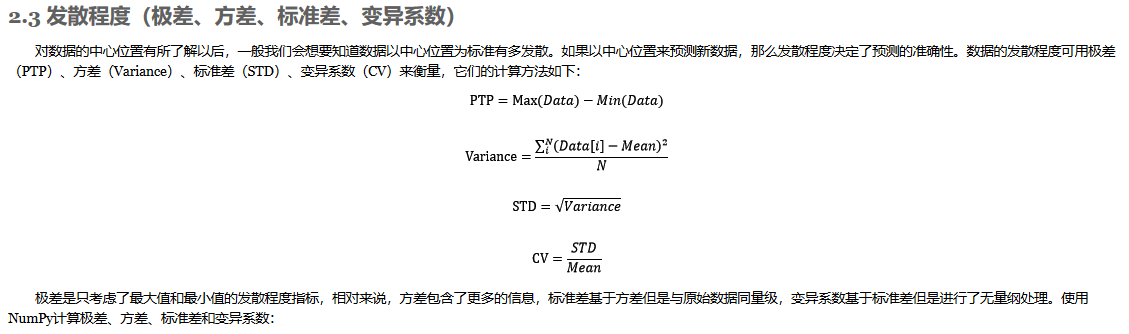

In [10]:
from numpy import mean, ptp, var, std

#极差，#方差，#标准差，#变异系数
ptp(data),var(data),std(data),mean(data) / std(data)

(6, 3.4400000000000004, 1.854723699099141, 3.019317649696275)

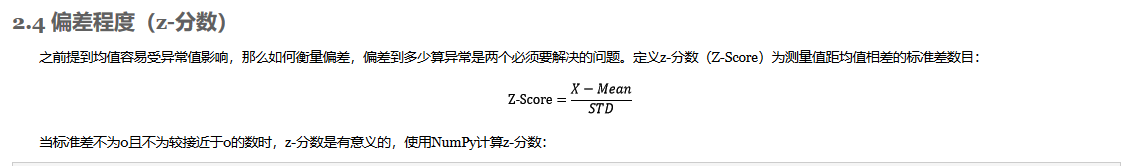

In [11]:
from numpy import mean, std
 
#计算第一个值的z-分数, 通常来说，z-分数的绝对值大于3将视为异常。
(data[0]-mean(data)) / std(data)

-0.323498319610315

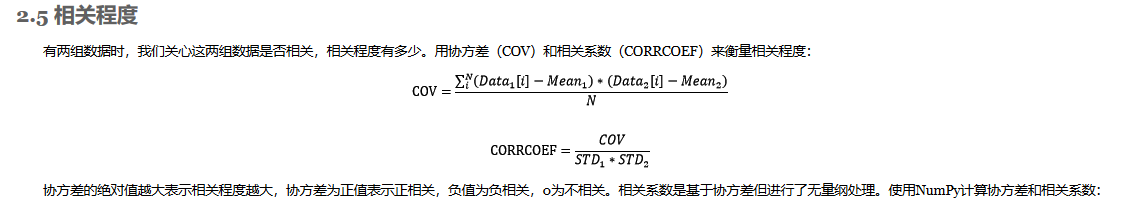

In [14]:
from numpy import array, cov, corrcoef

data1 = randint(0, 10, size=10)
data2 = randint(0, 10, size=10)
data = array([data1, data2])

#计算两组数的协方差
#参数bias=1表示结果需要除以N，否则只计算了分子部分
#返回结果为矩阵，第i行第j列的数据表示第i组数与第j组数的协方差。对角线为方差
cov(data, bias=1)

#计算两组数的相关系数
#返回结果为矩阵，第i行第j列的数据表示第i组数与第j组数的相关系数。对角线为1
corrcoef(data)

array([[ 1.        , -0.30837806],
       [-0.30837806,  1.        ]])

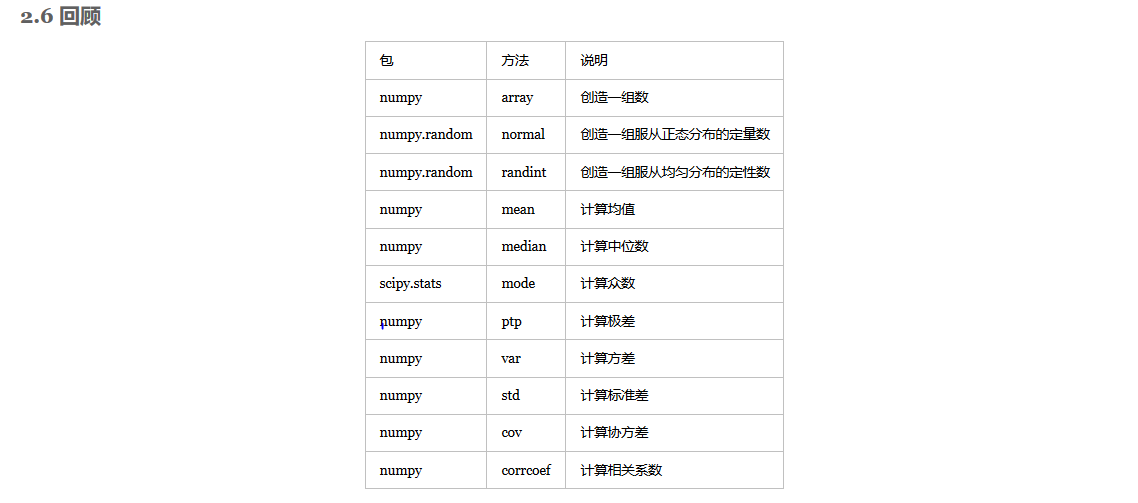

# 3 使用Matplotlib进行图分析

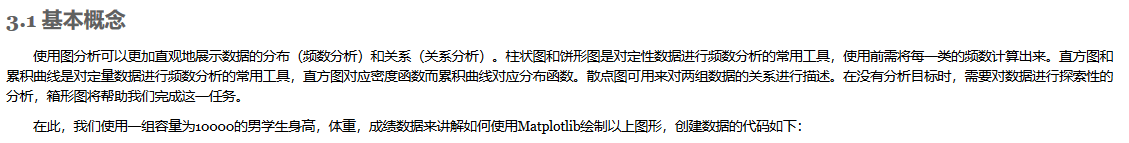

In [15]:
from numpy import array
from numpy.random import normal

def genData():
    heights = []
    weights = []
    grades = []
    N = 10000

    for i in range(N):
        while True:
            #身高服从均值172，标准差为6的正态分布
            height = normal(172, 6)
            if 0 < height: break
        while True:
            #体重由身高作为自变量的线性回归模型产生，误差服从标准正态分布
            weight = (height - 80) * 0.7 + normal(0, 1)
            if 0 < weight: break
        while True:
            #分数服从均值为70，标准差为15的正态分布
            score = normal(70, 15)
            if 0 <= score and score <= 100:
                grade = 'E' if score < 60 else ('D' if score < 70 else ('C' if score < 80 else ('B' if score < 90 else 'A')))
                break
        heights.append(height)
        weights.append(weight)
        grades.append(grade)
    return array(heights), array(weights), array(grades)

heights, weights, grades = genData()

In [54]:
import numpy as np
heights = 172 + 6 * np.random.randn(1000)
weights = (height - 80) * 0.7 + np.random.randn(1000)
scores = 70 + 15 * np.random.randn(1000)

grades = []

for score in scores:
    if 0 <= score and score <= 100:
        grade = 'E' if score < 60 else ('D' if score < 70 else ('C' if score < 80 else ('B' if score < 90 else 'A')))
    grades.append(grade)
    
grades = np.array(grades)

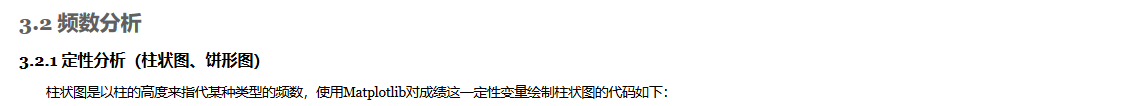grade.size

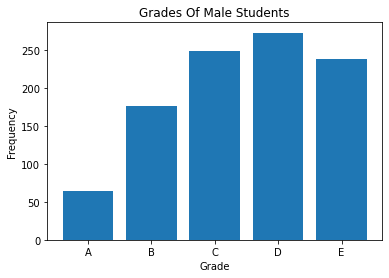

In [56]:
from matplotlib import pyplot

#绘制柱状图
def drawBar(grades):
    xticks = ['A', 'B', 'C', 'D', 'E']
    gradeGroup = {}
    #对每一类成绩进行频数统计
    for grade in grades:
        gradeGroup[grade] = gradeGroup.get(grade, 0) + 1
    #创建柱状图
    #第一个参数为柱的横坐标
    #第二个参数为柱的高度
    #参数align为柱的对齐方式，以第一个参数为参考标准
    pyplot.bar(range(5), [gradeGroup.get(xtick, 0) for xtick in xticks], align='center')

    #设置柱的文字说明
    #第一个参数为文字说明的横坐标
    #第二个参数为文字说明的内容
    pyplot.xticks(range(5), xticks)

    #设置横坐标的文字说明
    pyplot.xlabel('Grade')
    #设置纵坐标的文字说明
    pyplot.ylabel('Frequency')
    #设置标题
    pyplot.title('Grades Of Male Students')
    #绘图
    pyplot.show()

drawBar(grades)

而饼形图是以扇形的面积来指代某种类型的频率，使用Matplotlib对成绩这一定性变量绘制饼形图的代码如下：

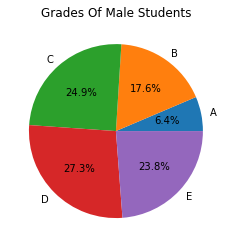

In [57]:
from matplotlib import pyplot

#绘制饼形图
def drawPie(grades):
    labels = ['A', 'B', 'C', 'D', 'E']
    gradeGroup = {}
    for grade in grades:
        gradeGroup[grade] = gradeGroup.get(grade, 0) + 1
    #创建饼形图
    #第一个参数为扇形的面积
    #labels参数为扇形的说明文字
    #autopct参数为扇形占比的显示格式
    pyplot.pie([gradeGroup.get(label, 0) for label in labels], labels=labels, autopct='%1.1f%%')
    pyplot.title('Grades Of Male Students')
    pyplot.show()

drawPie(grades)

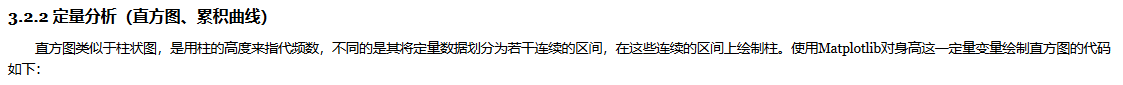

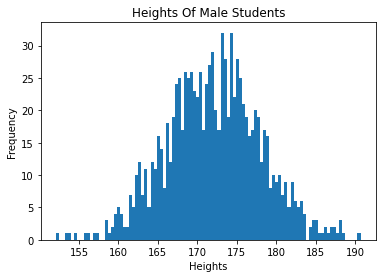

In [58]:
from matplotlib import pyplot

#绘制直方图
def drawHist(heights):
    #创建直方图
    #第一个参数为待绘制的定量数据，不同于定性数据，这里并没有事先进行频数统计
    #第二个参数为划分的区间个数
    pyplot.hist(heights, 100)
    pyplot.xlabel('Heights')
    pyplot.ylabel('Frequency')
    pyplot.title('Heights Of Male Students')
    pyplot.show()

drawHist(heights)

累积曲线对应数据的分布函数，由于身高变量是属于服从正态分布的，从绘制出来的累积曲线图上也可以直观地看出来：

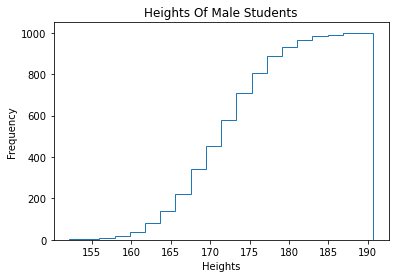

In [59]:
from matplotlib import pyplot

#绘制累积曲线
def drawCumulativeHist(heights):
    #创建累积曲线
    #第一个参数为待绘制的定量数据
    #第二个参数为划分的区间个数
    #normed参数为是否无量纲化
    #histtype参数为'step'，绘制阶梯状的曲线
    #cumulative参数为是否累积
    pyplot.hist(heights, 20, histtype='step', cumulative=True)
    pyplot.xlabel('Heights')
    pyplot.ylabel('Frequency')
    pyplot.title('Heights Of Male Students')
    pyplot.show()

drawCumulativeHist(heights)

# 3 距离度量

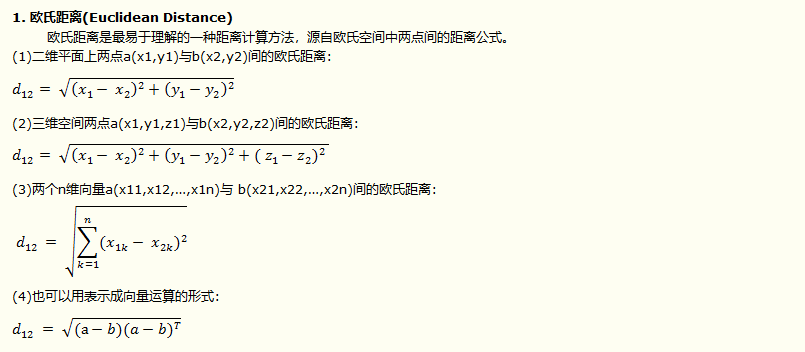

In [62]:
import numpy as np
x=np.random.random(10)
y=np.random.random(10)

#方法一：根据公式求解
d1=np.sqrt(np.sum(np.square(x-y)))

#方法二：根据scipy库求解
from scipy.spatial.distance import pdist
X=np.vstack([x,y])
d2=pdist(X)
d2

array([1.20425336])

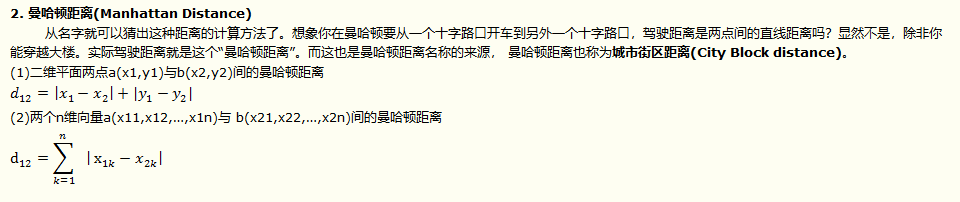

In [63]:
import numpy as np
x=np.random.random(10)
y=np.random.random(10)

#方法一：根据公式求解
d1=np.sum(np.abs(x-y))

#方法二：根据scipy库求解
from scipy.spatial.distance import pdist
X=np.vstack([x,y])
d2=pdist(X,'cityblock')
d2

array([2.32845723])

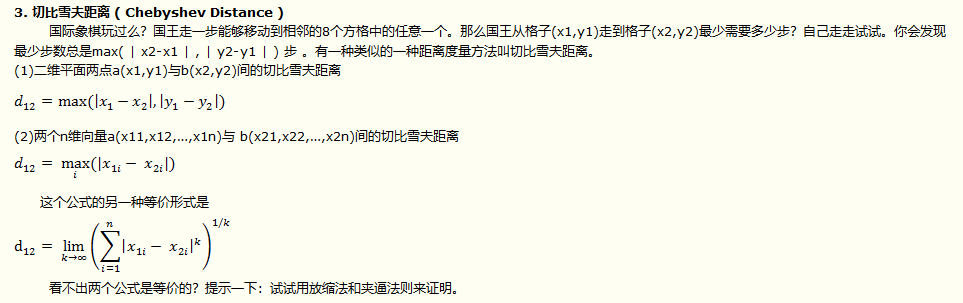

In [66]:
import numpy as np
x=np.random.random(10)
y=np.random.random(10)

#方法一：根据公式求解
d1=np.max(np.abs(x-y))

#方法二：根据scipy库求解
from scipy.spatial.distance import pdist
X=np.vstack([x,y])
d2=pdist(X,'chebyshev')
d2

array([0.58350787])

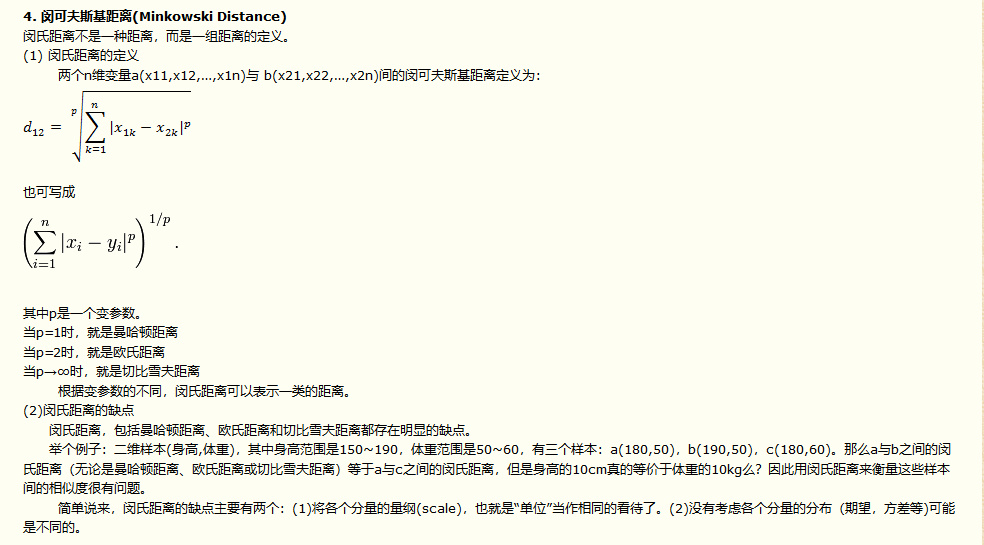

In [89]:
import numpy as np
x=np.random.random(10)
y=np.random.random(10)

#方法一：根据公式求解,p=2
d1=np.sqrt(np.sum(np.square(x-y)))

#方法二：根据scipy库求解
from scipy.spatial.distance import pdist
X=np.vstack([x,y])
d2=pdist(X,'minkowski',p=3)
d2

array([0.84541591])

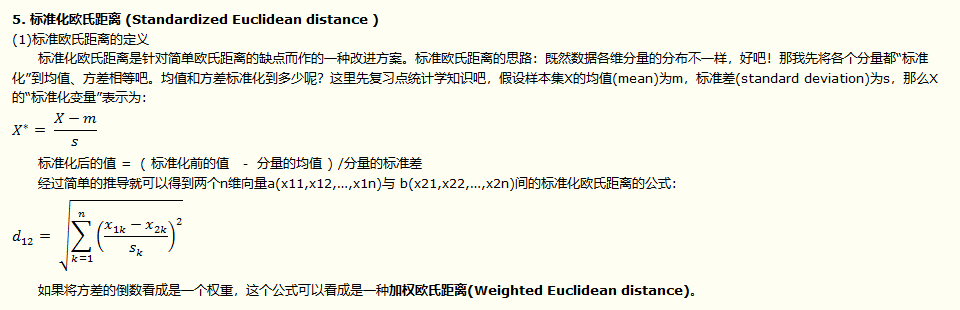

In [69]:
import numpy as np
x=np.random.random(10)
y=np.random.random(10)

X=np.vstack([x,y])

#方法一：根据公式求解
sk=np.var(X,axis=0,ddof=1)
d1=np.sqrt(((x - y) ** 2 /sk).sum())

#方法二：根据scipy库求解
from scipy.spatial.distance import pdist
d2=pdist(X,'seuclidean')
d2

array([4.47213595])

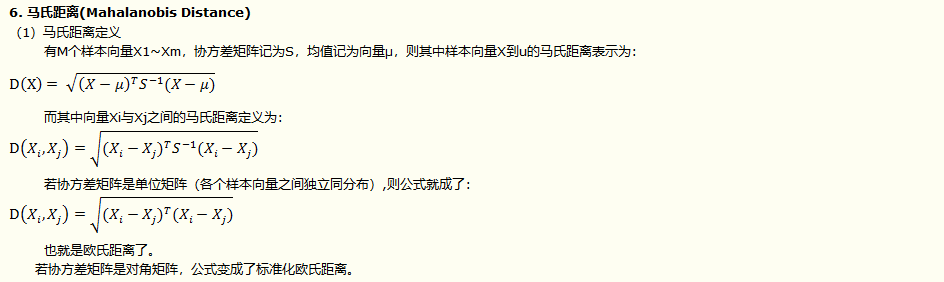

In [71]:
import numpy as np
x=np.random.random(10)
y=np.random.random(10)

#马氏距离要求样本数要大于维数，否则无法求协方差矩阵
#此处进行转置，表示10个样本，每个样本2维
X=np.vstack([x,y])
XT=X.T

#方法一：根据公式求解
S=np.cov(X)   #两个维度之间协方差矩阵
SI = np.linalg.inv(S) #协方差矩阵的逆矩阵
#马氏距离计算两个样本之间的距离，此处共有10个样本，两两组合，共有45个距离。
n=XT.shape[0]
d1=[]
for i in range(0,n):
    for j in range(i+1,n):
        delta=XT[i]-XT[j]
        d=np.sqrt(np.dot(np.dot(delta,SI),delta.T))
        d1.append(d)
        
#方法二：根据scipy库求解
from scipy.spatial.distance import pdist
d2=pdist(XT,'mahalanobis')
d2

array([1.95443932, 0.82459617, 2.54517606, 2.31286878, 1.99570327,
       0.32354101, 1.09622505, 0.41845827, 1.87364927, 2.74323714,
       1.62448   , 3.22335068, 2.82595801, 2.11923458, 1.11137208,
       2.35652715, 3.04962387, 3.33389048, 2.61707434, 2.39264872,
       0.85130336, 1.91652367, 0.40692775, 2.10633633, 2.36761013,
       2.04020773, 2.49217028, 1.48872835, 2.93743752, 2.4698495 ,
       0.39795721, 2.00941821, 2.19176568, 2.42044381, 0.5234133 ,
       1.70871925, 1.79652784, 2.15131912, 0.49515065, 1.13592803,
       0.48764915, 1.55729818, 1.5098736 , 1.95862793, 1.93469364])

7.余弦相似度：
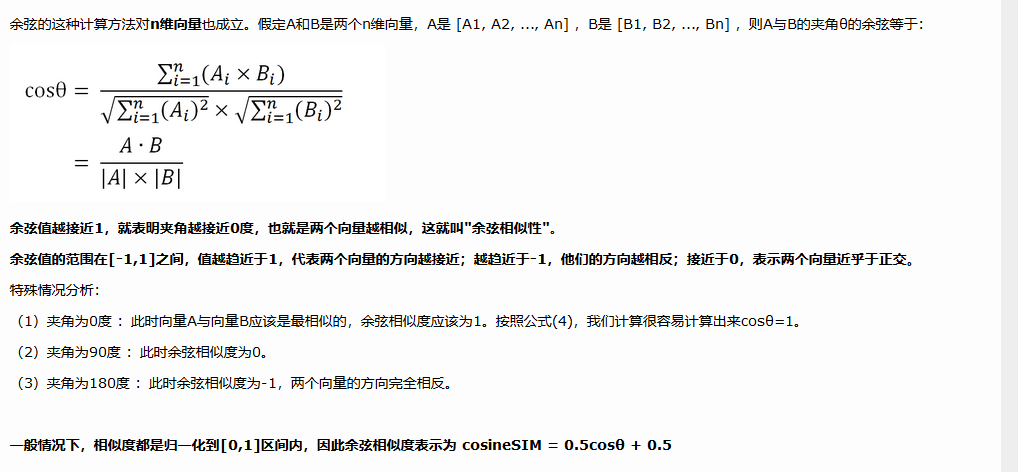

In [87]:
import numpy as np

def bit_product_sum(x, y):
    return sum([item[0] * item[1] for item in zip(x, y)])


def cosine_similarity(x, y, norm=False):
    
    """ 计算两个向量x和y的余弦相似度 """
    assert len(x) == len(y), "len(x) != len(y)"
    zero_list = [0] * len(x)
    if x == zero_list or y == zero_list:
        return float(1) if x == y else float(0)

    # method 1
    res = np.array([[x[i] * y[i], x[i] * x[i], y[i] * y[i]] for i in range(len(x))])
    cos = sum(res[:, 0]) / (np.sqrt(sum(res[:, 1])) * np.sqrt(sum(res[:, 2])))

    # method 2
    # cos = bit_product_sum(x, y) / (np.sqrt(bit_product_sum(x, x)) * np.sqrt(bit_product_sum(y, y)))

    # method 3
    # dot_product, square_sum_x, square_sum_y = 0, 0, 0
    # for i in range(len(x)):
    #     dot_product += x[i] * y[i]
    #     square_sum_x += x[i] * x[i]
    #     square_sum_y += y[i] * y[i]
    # cos = dot_product / (np.sqrt(square_sum_x) * np.sqrt(square_sum_y))

    return 0.5 * cos + 0.5 if norm else cos  # 归一化到[0, 1]区间内

In [88]:
if __name__ == '__main__':
    print(cosine_similarity([0, 0], [0, 0]))  # 1.0
    print(cosine_similarity([1, 1], [0, 0]))  # 0.0
    print(cosine_similarity([1, 1], [-1, -1]))  # -1.0
    print(cosine_similarity([1, 1], [2, 2]))  # 1.0
    print(cosine_similarity([3, 3], [4, 4]))  # 1.0
    print(cosine_similarity([1, 2, 2, 1, 1, 1, 0], [1, 2, 2, 1, 1, 2, 1]))  # 0.938194187433

1.0
0.0
-0.9999999999999998
0.9999999999999998
1.0
0.9381941874331419
